In [1]:
from src import esma

In [2]:
model = esma.project(project_id='MnTe_SOC')

In [3]:
model.set_pseudo(path="/work/bansil/s.sevim/Test/espresso-machine/Pseudopotentials/PBE/US/SOC")

In [4]:
model.get_structure(format="poscar",path="/work/bansil/s.sevim/Test/espresso-machine/Structures/MnTe.poscar")

In [5]:
model.set_cores(64)
model.ecutwfc(100) #Set wavefunction cutoff
model.ecutrho(1000) #Set wavefunction cutoff
model.k_points([8,8,5]) #Set number of k points
model.degauss(0.01) #Set degauss value
model.conv_thr(1e-6) #Set convergence threshold
model.smearing('mv')
model.electron_maxstep(500) #Max number of electron iteration
model.exchange_maxstep(500) #Max number of exchange iteration
model.hubbard(atom='Mn',orbital='3d',value=4)
# model.etot_conv_thr(10**-4)
# model.forc_conv_thr(10**-3)

In [6]:
points = [
            ['GAMMA',0,0,0],
            ['M',0.5,0,0],
            ["M'",0.5,0,0.35],
            ["GAMMA'",0,0,0.35],
            ["K",0.33333,0.3333,0]
            ]

In [7]:
import copy
import numpy as np

In [8]:
models = []
strain = np.arange(0.96,1.045,0.005)
for i in strain:
    temp_model = copy.deepcopy(model)
    temp_model.strain(axis=['x','y'],value=i)
    models.append(temp_model)

In [9]:
def workflow(model,id):
    afm = model.magnetize(magnetic_atom='Mn',angle1=90,angle2=120)[1]    
    afm.soc()
    afm.job_id = f"strain_{id}"
    afm.calculate('scf')
    path = ['K','GAMMA','K'] #choose corners
    afm.band_points(path,number=50,points=points) #define path
    afm.calculate('bands',pp_core=8)
    a = round(float(model.cell()[0][0]),3)
    ac = round(float(model.cell()[2][2])/float(model.cell()[0][0]),3)
    epsilon = round(id-1,3)
    afm.plot('electron',ylim=[9,13],save=True,figsize=(4,6),save_name='plot_KGK',title=fr"$\epsilon$={epsilon} a={a} a/c={ac}") #plot electron bands
    path = ['M','GAMMA','M'] #choose corners
    afm.band_points(path,number=50,points=points) #define path
    afm.calculate('bands',pp_core=8)
    afm.plot('electron',ylim=[9,13],save=True,figsize=(4,6),save_name='plot_MGM',title=fr"$\epsilon$={epsilon} a={a} a/c={ac}") #plot electron bands
    # path = ["M'","GAMMA'","M'"] #choose corners
    # afm.band_points(path,number=100,points=points,save_name='plot_MGM') #define path
    # afm.calculate('bands',pp_core=32)

scf for strain_0.96 is started
scf for strain_0.96 is finished
bands for strain_0.96 is started
bands for strain_0.96 is finished
bands-pp for strain_0.96 is started
bands-pp for strain_0.96 is finished
bands for strain_0.96 is started
bands for strain_0.96 is finished
bands-pp for strain_0.96 is started
bands-pp for strain_0.96 is finished
scf for strain_0.965 is started
scf for strain_0.965 is finished
bands for strain_0.965 is started
bands for strain_0.965 is finished
bands-pp for strain_0.965 is started
bands-pp for strain_0.965 is finished
bands for strain_0.965 is started
bands for strain_0.965 is finished
bands-pp for strain_0.965 is started
bands-pp for strain_0.965 is finished
scf for strain_0.97 is started
scf for strain_0.97 is finished
bands for strain_0.97 is started
bands for strain_0.97 is finished
bands-pp for strain_0.97 is started
bands-pp for strain_0.97 is finished
bands for strain_0.97 is started
bands for strain_0.97 is finished
bands-pp for strain_0.97 is starte

/work/bansil/s.sevim/Test/espresso-machine/src/esma/compute.py:24: SyntaxWarning: invalid escape sequence '\('
  p = subprocess.Popen(f"sumpdos.x ./Projects/{self.project_id}/{self.job_id}/*\({atom}\)*\({orbital}\) > ./Projects/{self.project_id}/{self.job_id}/sumpdos_{atom}_{orbital}.dat", shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
/work/bansil/s.sevim/Test/espresso-machine/src/esma/compute.py:24: SyntaxWarning: invalid escape sequence '\)'
  p = subprocess.Popen(f"sumpdos.x ./Projects/{self.project_id}/{self.job_id}/*\({atom}\)*\({orbital}\) > ./Projects/{self.project_id}/{self.job_id}/sumpdos_{atom}_{orbital}.dat", shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
/work/bansil/s.sevim/Test/espresso-machine/src/esma/compute.py:24: SyntaxWarning: invalid escape sequence '\)'
  p = subprocess.Popen(f"sumpdos.x ./Projects/{self.project_id}/{self.job_id}/*\({atom}\)*\({orbital}\) > ./Projects/{self.project_id}/{self.job_id}/sumpdos_{atom}_{orbital}.dat", she

KeyboardInterrupt: 

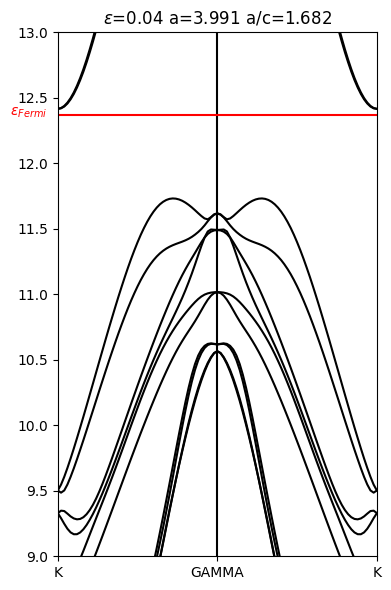

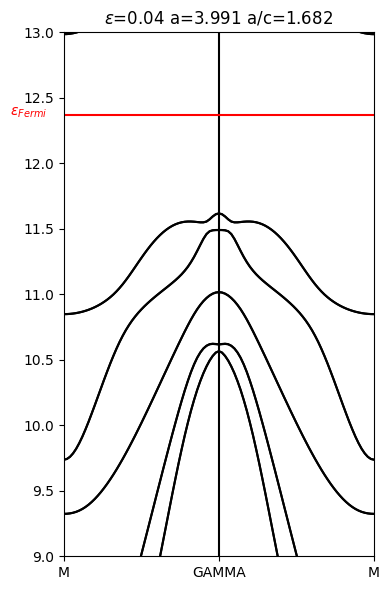

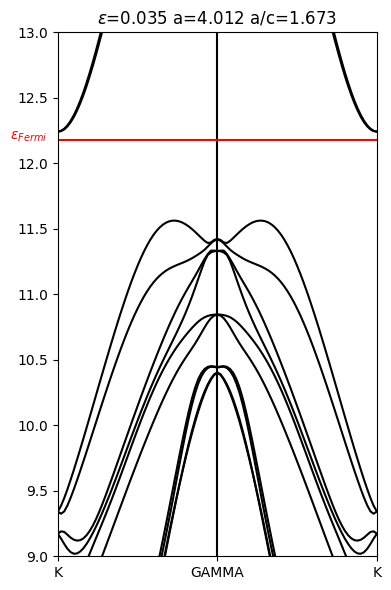

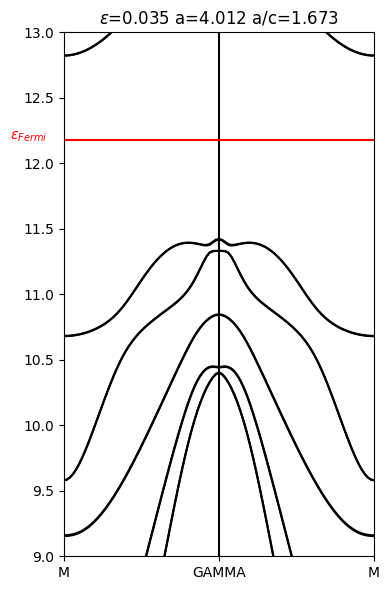

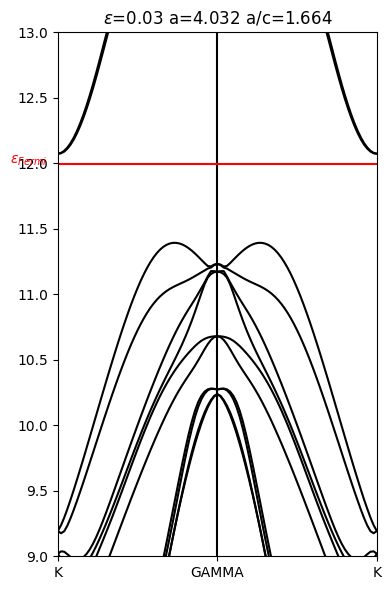

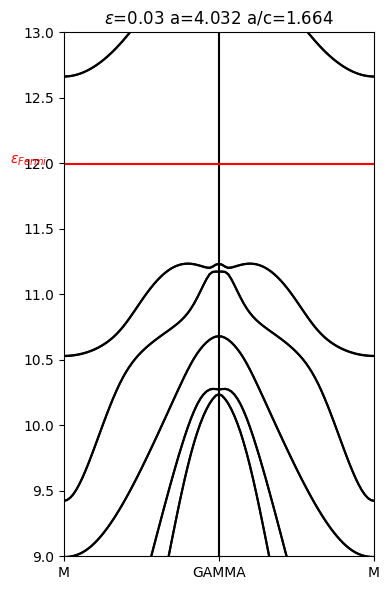

In [10]:
for i,model in enumerate(models):
    workflow(model,strain[i])